## Homework

The goal of this notebook is:

* Data preparation and data cleaning
* EDA
* feature importance analysis
* Model selection process and parameter tuning

The variable to predict will be 'gender'

### Dataset

In this notebook, we will use the Young People Survey data from [Kaggle](https://www.kaggle.com/datasets/miroslavsabo/young-people-survey).

##### Observations

* The data file (responses.csv) consists of 1010 rows and 150 columns (139
integer and 11 categorical).
* For convenience, the original variable names were shortened in the
data file. See the columns.csv file if you want to match the data with the original names.
* The data contain missing values.
* The survey was presented to participants in both electronic and written form.
* The original questionnaire was in Slovak language and was later translated
into English.
* All participants were of Slovakian nationality, aged between 15-30.


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# 1) Data preparation

In [46]:
df = pd.read_csv('responses.csv')

In [47]:
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('-','')

In [48]:
df.head()

music  slow_songs_or_fast_songs  dance  folk  country  classical_music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   musical  pop  rock  metal_or_hardrock  ...   age  height  weight  \
0      1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
1      2.0  3.0   5.0                4.0  ...  19.0   163.0    58.0   
2      5.0  3.0   5.0                3.0  ...  20.0   176.0    67.0   
3      1.0  2.0   2.0                1.0  ...  22.0   172.0    59.0   
4      3.0  5.0   3.0                1.0  ...  20.0   170.0    59.0   

   number_of_siblings  gender  left__right_handed                education  \
0                 1.0  female        right handed  college/bachelor degree   
1                 2.0  female        right handed  college/bachelor degree   
2                 2.0  female        right handed         secondary school   
3                 1.0  female        right handed  college/bachelor degree   
4                 1.0  female        right handed         secondary school   

   only_child  village__town  house__block_of_flats  
0          no        village         block of flats  
1          no           city         block of flats  
2          no           city         block of flats  
3         yes           city         house/bungalow  
4          no        village         house/bungalow  

[5 rows x 150 columns]

## 1.1 Describe data

In [49]:
df.describe()

music  slow_songs_or_fast_songs        dance         folk  \
count  1007.000000               1008.000000  1006.000000  1005.000000   
mean      4.731877                  3.328373     3.113320     2.288557   
std       0.664049                  0.833931     1.170568     1.138916   
min       1.000000                  1.000000     1.000000     1.000000   
25%       5.000000                  3.000000     2.000000     1.000000   
50%       5.000000                  3.000000     3.000000     2.000000   
75%       5.000000                  4.000000     4.000000     3.000000   
max       5.000000                  5.000000     5.000000     5.000000   

           country  classical_music      musical          pop         rock  \
count  1005.000000      1003.000000  1008.000000  1007.000000  1004.000000   
mean      2.123383         2.956132     2.761905     3.471698     3.761952   
std       1.076136         1.252570     1.260845     1.161400     1.184861   
min       1.000000         1.000000     1.000000     1.000000     1.000000   
25%       1.000000         2.000000     2.000000     3.000000     3.000000   
50%       2.000000         3.000000     3.000000     4.000000     4.000000   
75%       3.000000         4.000000     4.000000     4.000000     5.000000   
max       5.000000         5.000000     5.000000     5.000000     5.000000   

       metal_or_hardrock  ...  shopping_centres  branded_clothing  \
count        1007.000000  ...       1008.000000       1008.000000   
mean            2.361470  ...          3.234127          3.050595   
std             1.372995  ...          1.323062          1.306321   
min             1.000000  ...          1.000000          1.000000   
25%             1.000000  ...          2.000000          2.000000   
50%             2.000000  ...          3.000000          3.000000   
75%             3.000000  ...          4.000000          4.000000   
max             5.000000  ...          5.000000          5.000000   

       entertainment_spending  spending_on_looks  spending_on_gadgets  \
count             1007.000000        1007.000000          1010.000000   
mean                 3.201589           3.106256             2.870297   
std                  1.188947           1.205368             1.284970   
min                  1.000000           1.000000             1.000000   
25%                  2.000000           2.000000             2.000000   
50%                  3.000000           3.000000             3.000000   
75%                  4.000000           4.000000             4.000000   
max                  5.000000           5.000000             5.000000   

       spending_on_healthy_eating          age      height      weight  \
count                  1008.00000  1003.000000  990.000000  990.000000   
mean                      3.55754    20.433699  173.514141   66.405051   
std                       1.09375     2.828840   10.024505   13.839561   
min                       1.00000    15.000000   62.000000   41.000000   
25%                       3.00000    19.000000  167.000000   55.000000   
50%                       4.00000    20.000000  173.000000   64.000000   
75%                       4.00000    22.000000  180.000000   75.000000   
max                       5.00000    30.000000  203.000000  165.000000   

       number_of_siblings  
count         1004.000000  
mean             1.297809  
std              1.013348  
min              0.000000  
25%              1.000000  
50%              1.000000  
75%              2.000000  
max             10.000000  

[8 rows x 139 columns]

In [50]:
df.dtypes.value_counts()

float64    134
object      11
int64        5
dtype: int64

<AxesSubplot:>

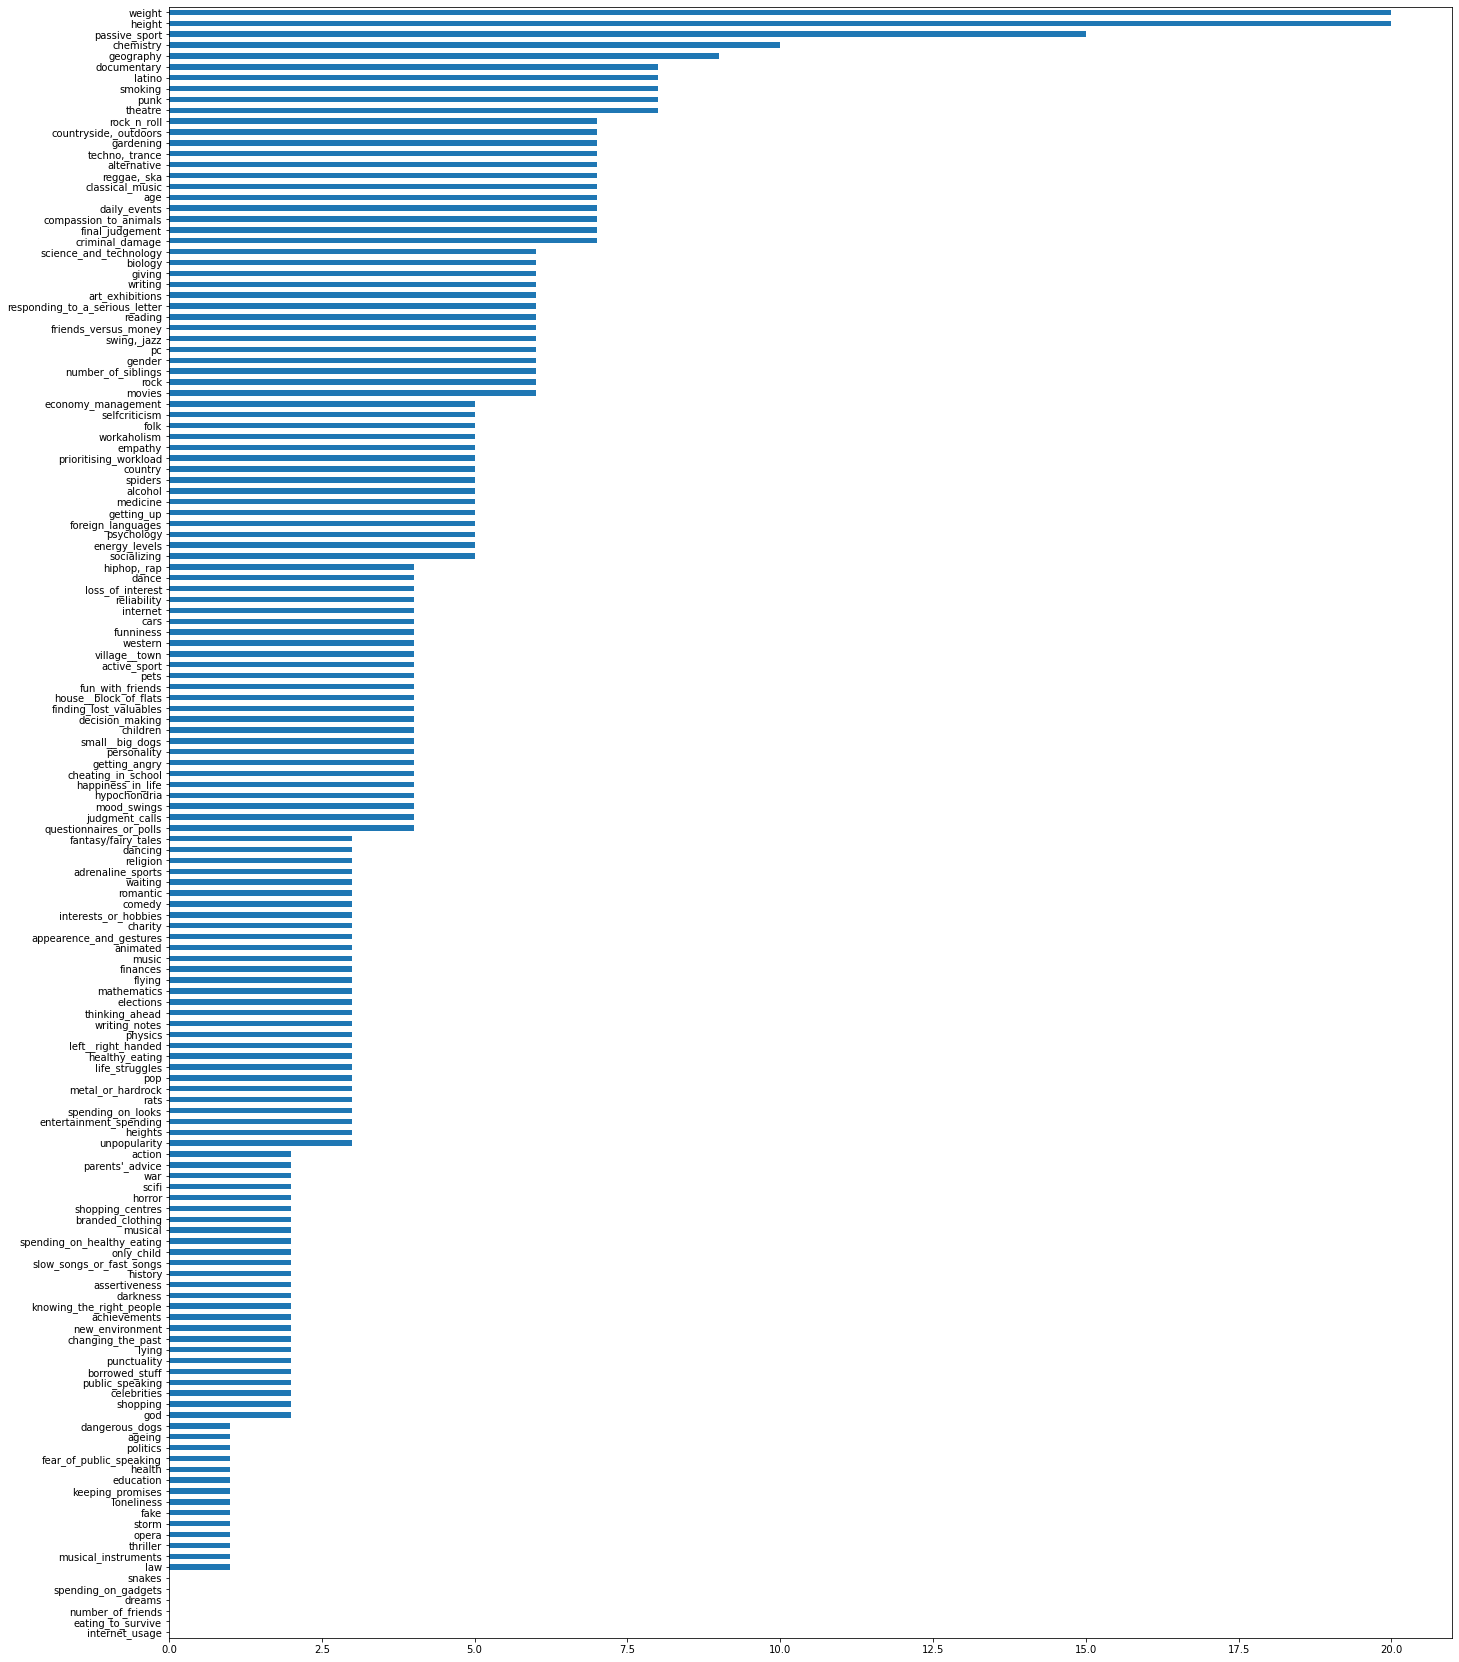

In [6]:
nulls = df.isnull().sum().sort_values()
nulls.plot.barh(  figsize=(23, 30))

`Weight` and `height` are the main characteristics that have missing values

In [7]:
df_nulls = pd.concat([df['weight'].isnull(),df['height'].isnull(),df['gender']],axis=1) 
df_nulls.groupby('gender').sum()

weight  height
gender                
female      13      13
male         6       6

Women omitted 13 values, which is more than double that of men 

In [12]:
df['gender'].isnull().sum()

6

6 rows have no gender. these rows will be deleted

In [15]:
df =df.dropna(subset=['gender'])

## 1.2 Validation framework

- `Note`: More steps are needed to complete the validation framework, this will be done later.

In [51]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [52]:
len(df_train), len(df_test)

(808, 202)

# 2) EDA

In [21]:
def plot_group_differences(start='music',end='metal_or_hardrock',title='Music preferences'):
    #process the data
    df_range = df_train.loc[:, start:end]
    df_by_gender = pd.concat([df_range,df['gender']],axis=1)
    df_unpivot = pd.melt(df_by_gender, id_vars='gender')
    df_stats =df_unpivot.groupby(['variable','gender']).mean().reset_index()
    #Get the length and index of the data for visualization parameters
    len_values = int(len(df_stats)*0.5) #Half because the group is divided by female and male 
    group_index =list(range(len_values))
    figHeight = int(len_values*0.5)
    #Global styles
    fig, ax = plt.subplots()
    plt.rc('font', size=18)
    sns.set(rc={"figure.figsize":(20, figHeight)},font_scale=1.5) 
    
    #Draw plot
    sns.scatterplot(y="variable",x="value",data=df_stats, hue="gender" ,s=400)
    
    #Plot styles
    ax.hlines(y=group_index, xmin=1, xmax=5, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
    ax.vlines(x=3, ymin=0, ymax=len_values, color='red', alpha=0.7, linewidth=5, linestyles='solid')
    ax.set_xlim(1, 5)
    ax.set(xlabel='avg response', ylabel=title )
    plt.yticks(fontweight = 'bold')
    sns.move_legend( ax, "lower center",  bbox_to_anchor=(0.5, 1), ncol=2)
        

### Music preferences

In [23]:
plot_group_differences('music','opera','Music preferences')

### Movie preferences

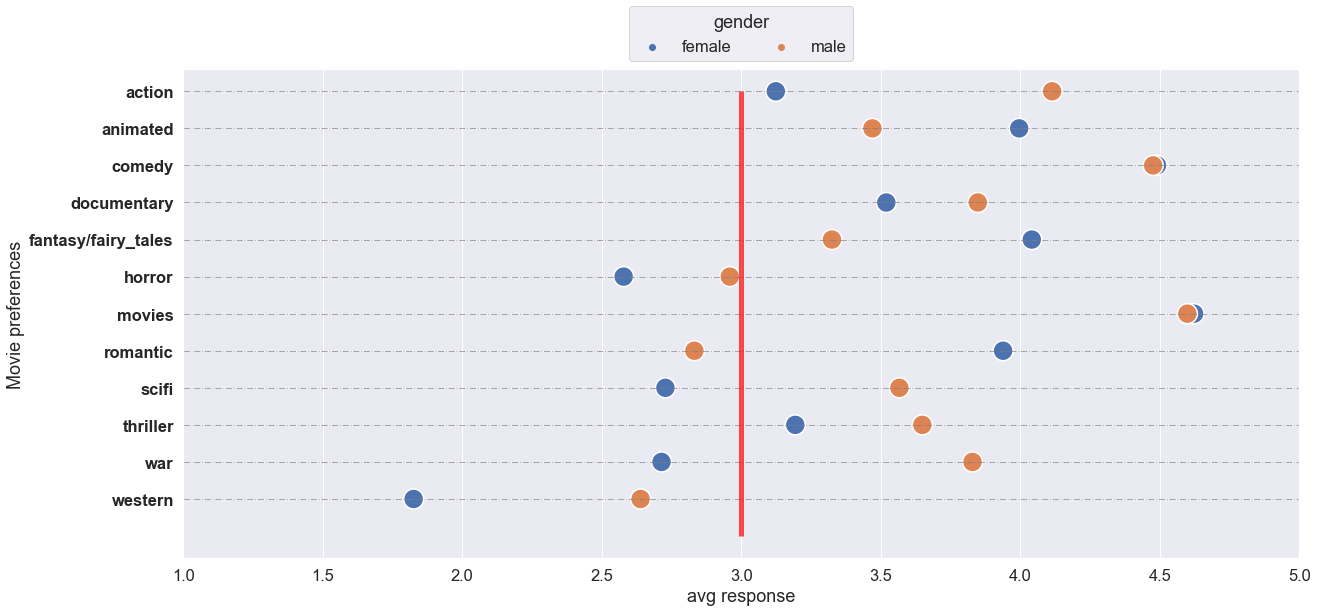

In [24]:
plot_group_differences('movies','action','Movie preferences')

### HOBBIES & INTERESTS

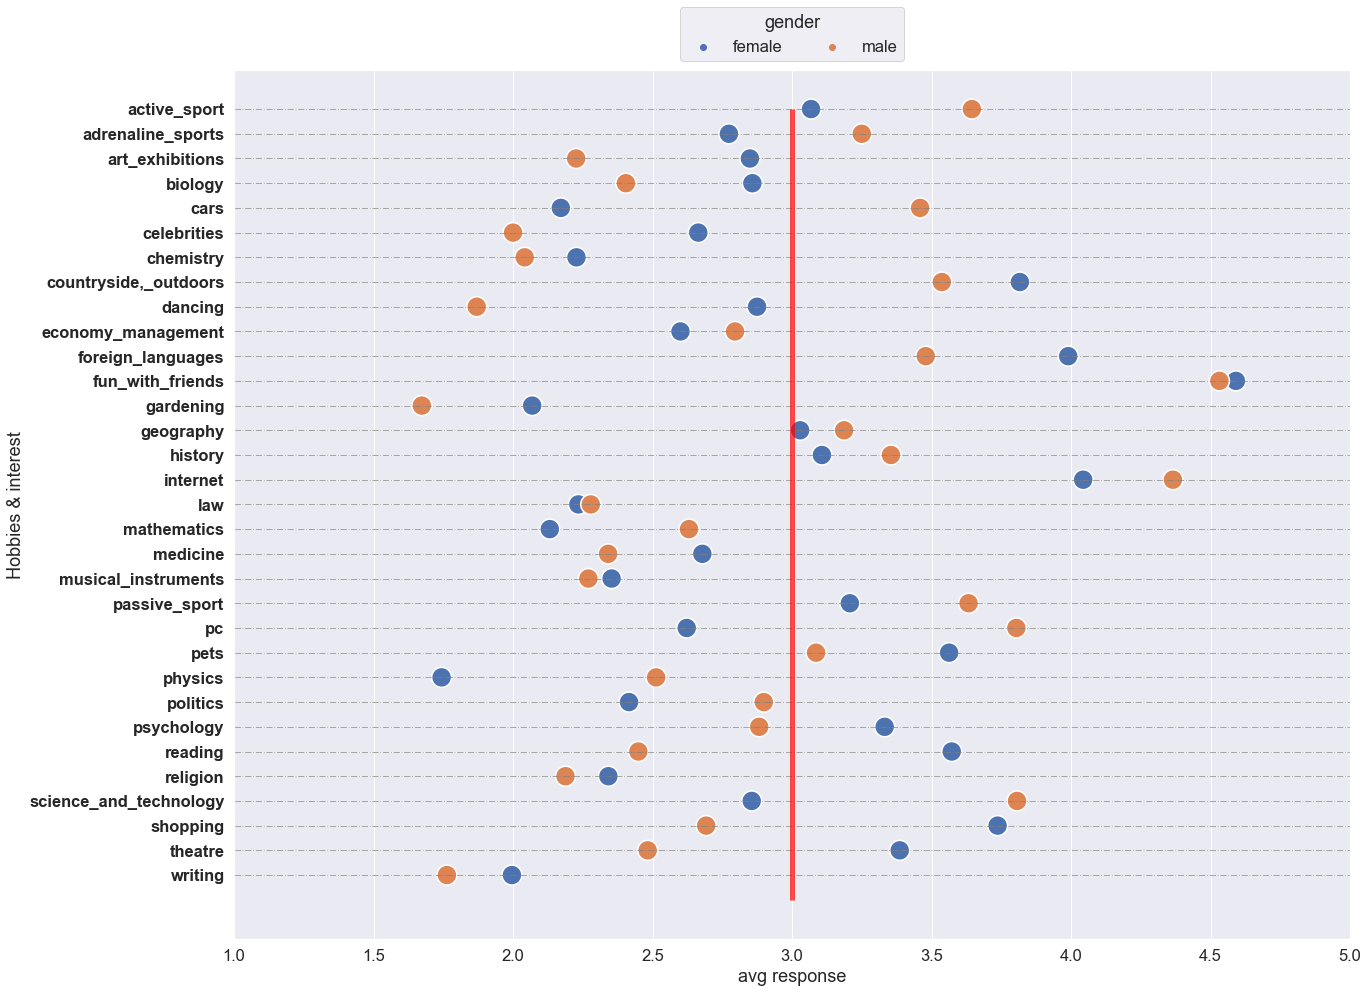

In [26]:
plot_group_differences('history','pets','Hobbies & interest')

### PHOBIAS

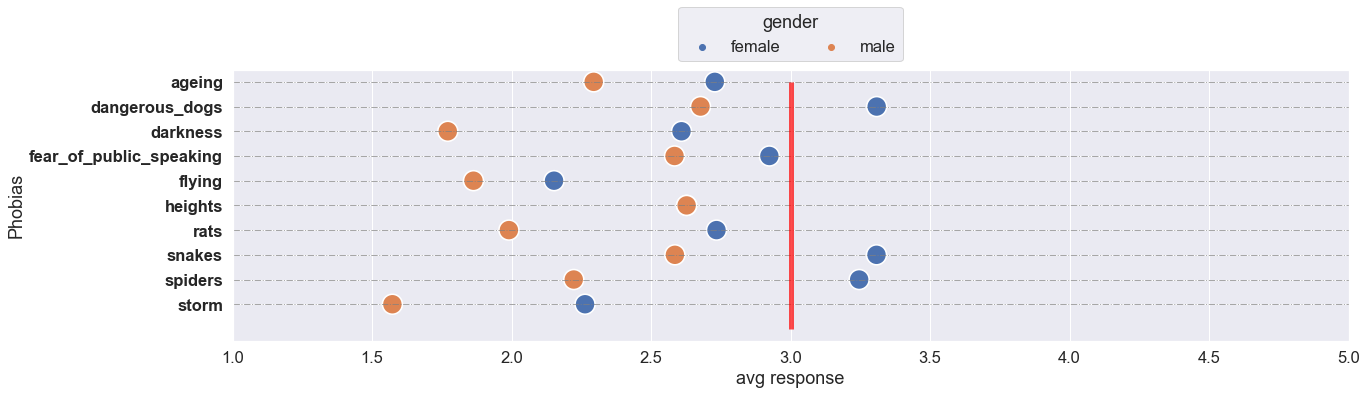

In [28]:
plot_group_differences('flying','fear_of_public_speaking','Phobias')

### HEALTH HABITS


<AxesSubplot:xlabel='alcohol', ylabel='count'>

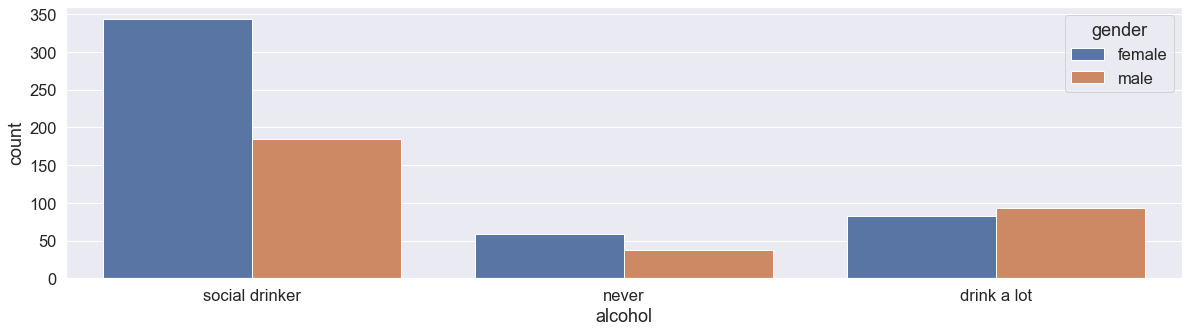

In [29]:
sns.countplot(data=df_train[['alcohol','gender']], x="alcohol", hue="gender")


### SPENDING HABITS

In [30]:
plot_group_differences('finances','spending_on_healthy_eating','Spending habits')

### DEMOGRAPHICS
- Analysis for categorical variables

In [31]:
cat_var = ['left__right_handed','education','only_child','village__town','house__block_of_flats']
cat_df = df_train[[*cat_var,'gender']]

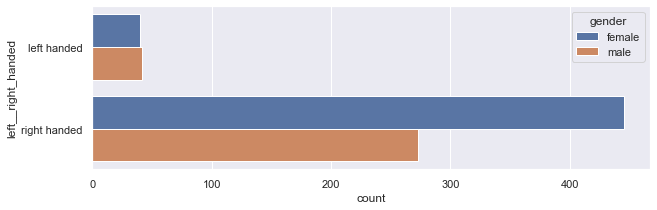

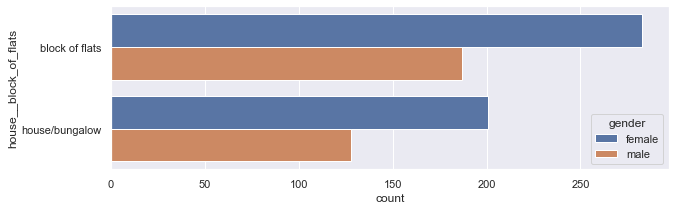

In [36]:
for var in cat_var:
    sns.countplot(data=cat_df ,y=var,  hue="gender")
    plt.show()

- Analysis for numerical variables

In [37]:
num_var = ['age','height','weight']
num_df = df_train[[*num_var,'gender']]

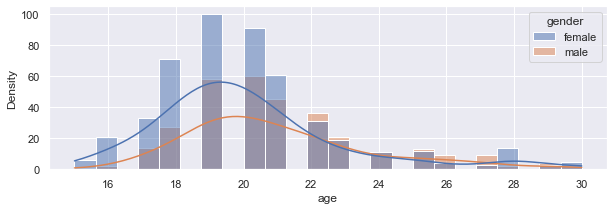

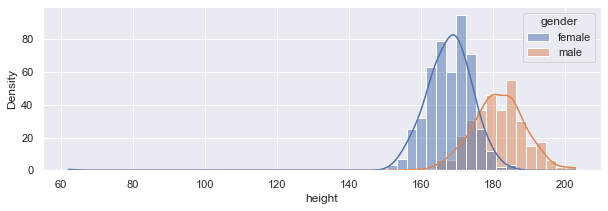

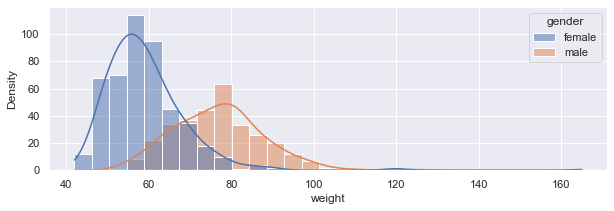

In [38]:

for var in num_var:
    sns.histplot(data=num_df , x=var, kde=True, hue="gender")
    plt.ylabel('Density')
    plt.show()


### Is imbalanced dataset? 

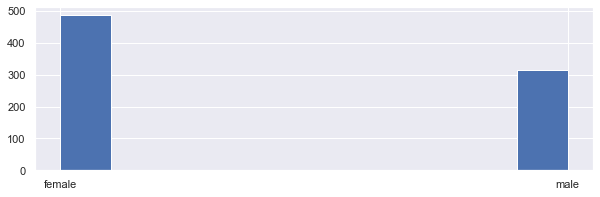

In [39]:
df_train['gender'].hist()
print()

### Correlation

In [154]:
corr = df.corr()

Text(0.5, 1.0, 'Features correlation')

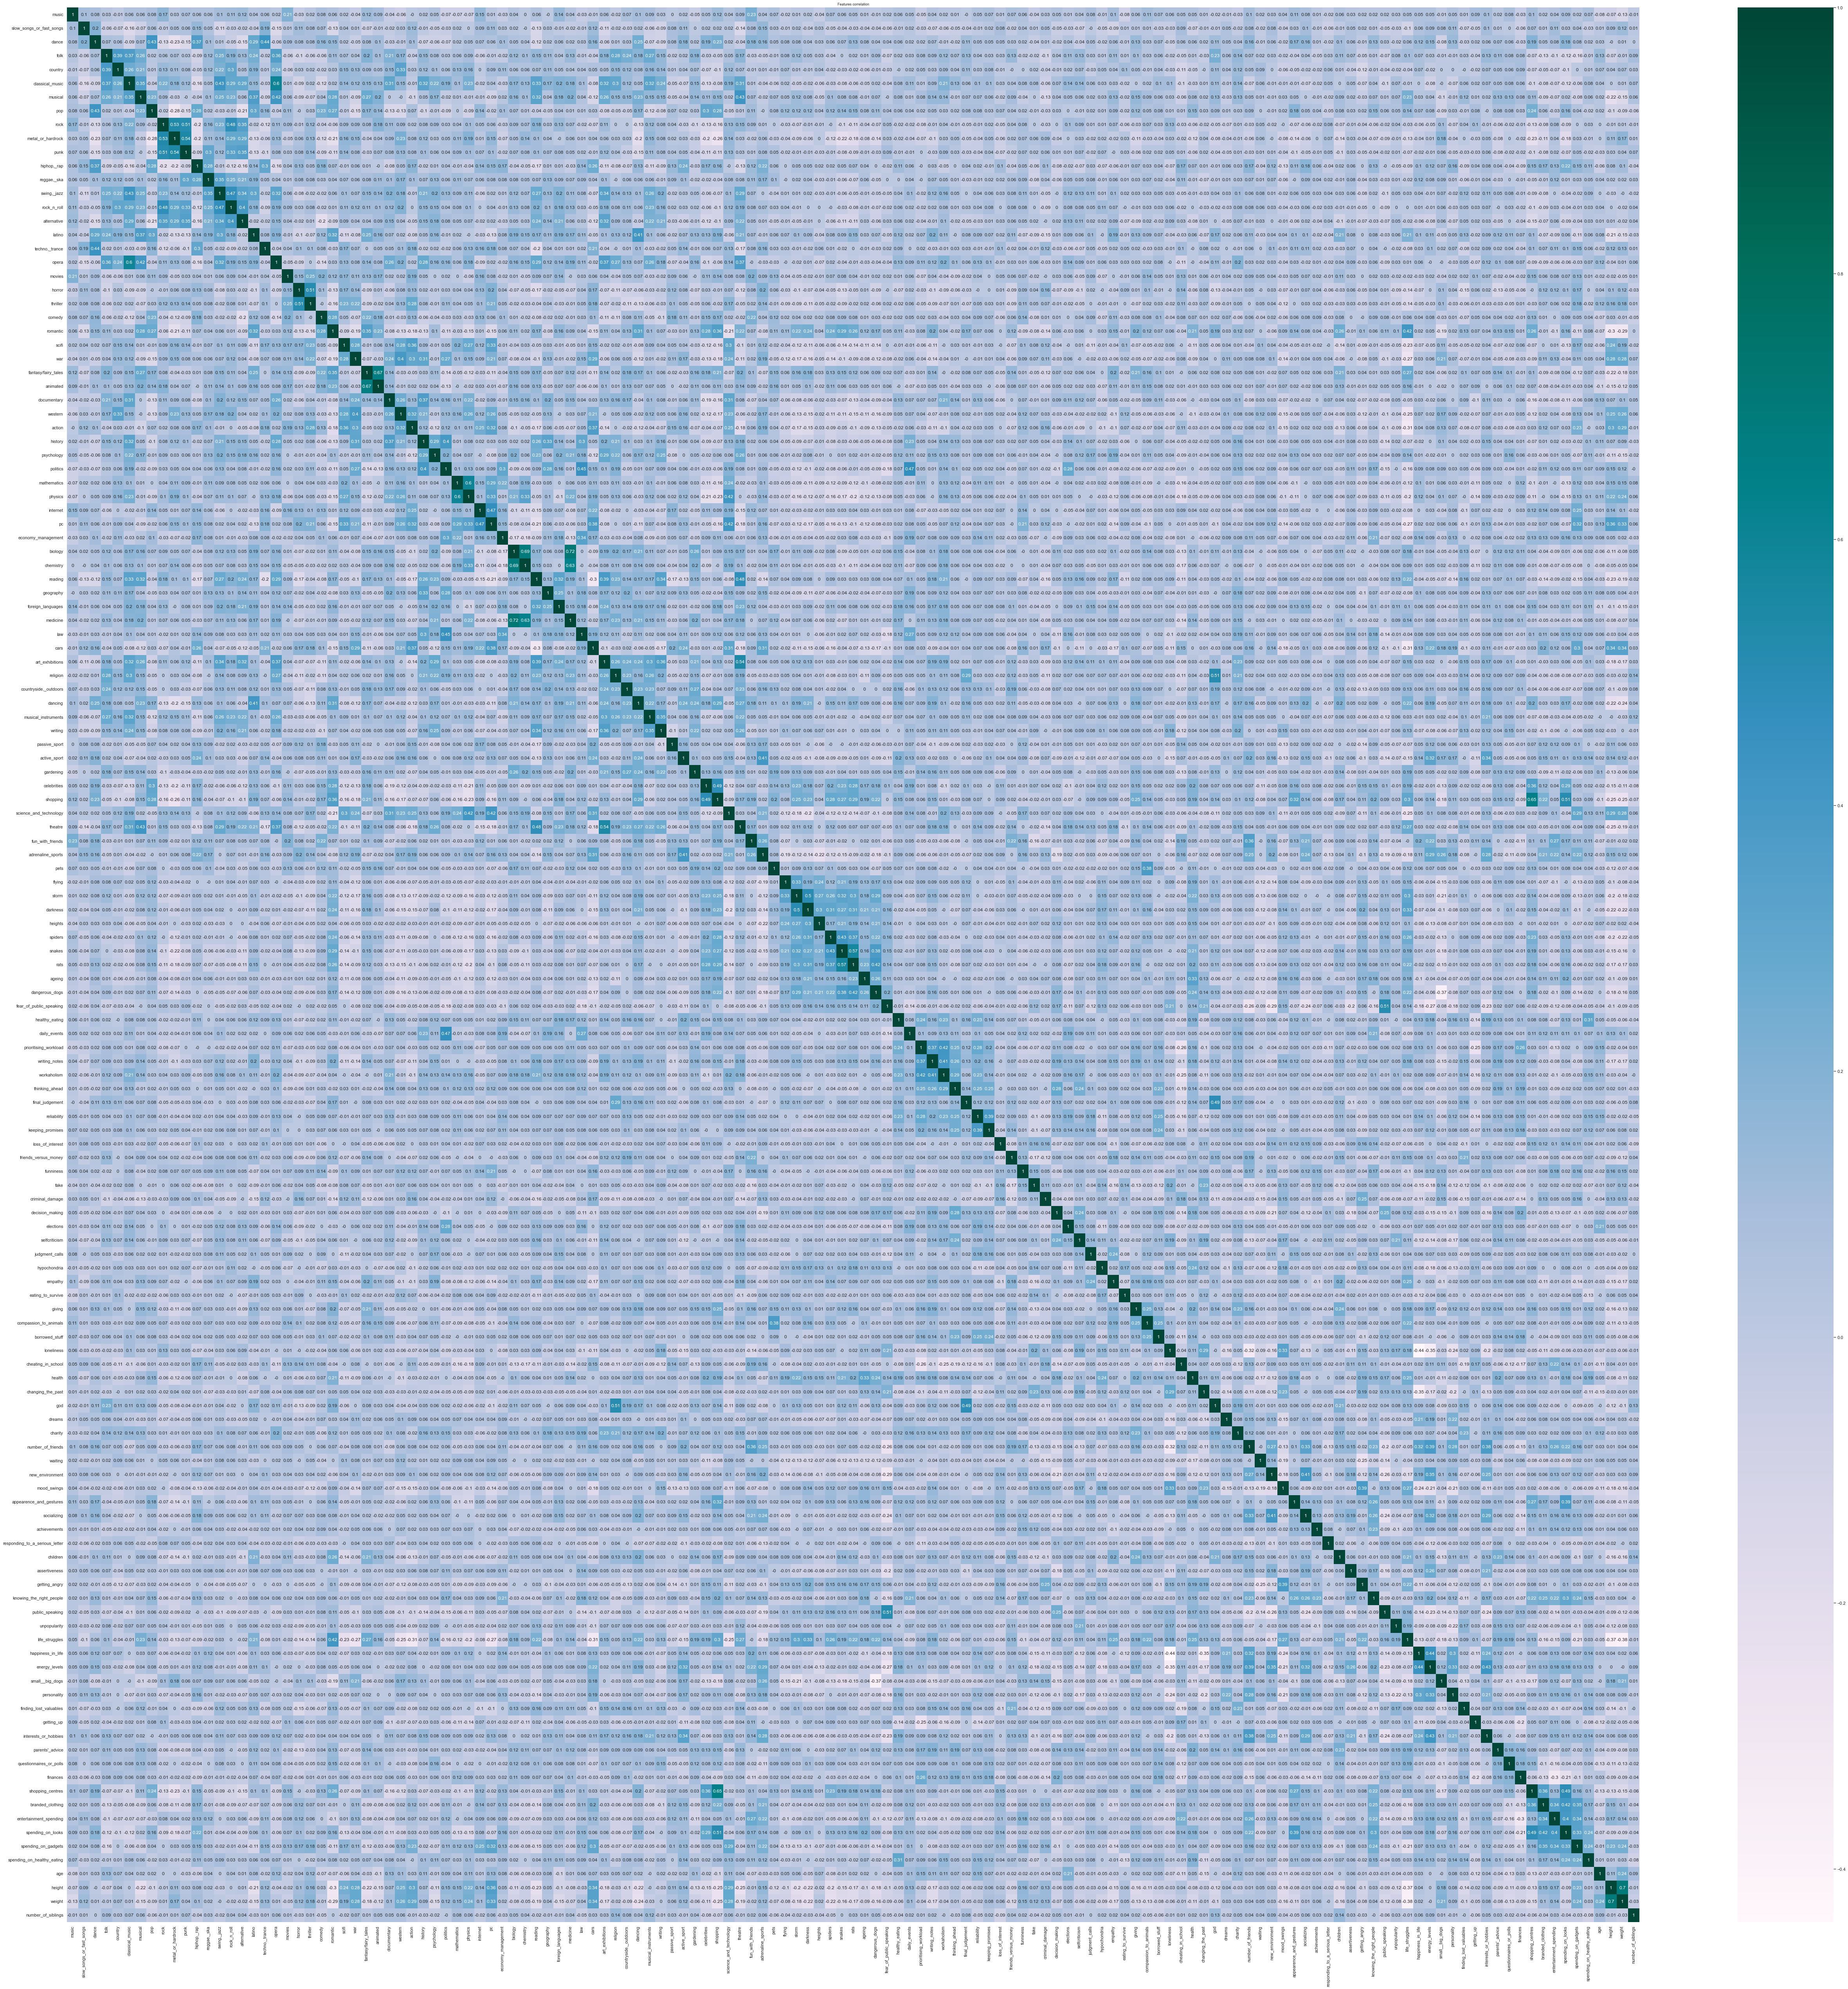

In [157]:
plt.figure(figsize=(90,90))
hm=sns.heatmap(corr.round(2),cmap="PuBuGn",annot=True)
hm.set_title('Features correlation', fontdict={'fontsize':9})

## 3) Feature importance 

#### 3.1) Feature importance - numerical variables

I suppose that a numerical feature is important, if the average of male and female is very different in such feature.

In [53]:
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    df_group = df_train.groupby(['gender']).mean().reset_index()
    df_group.set_index("gender", inplace=True)
    df_group= df_group.T
    df_group['diff'] = np.abs(df_group['female'] -df_group['male']) 
    df_group =df_group[df_group['diff']>0.5]
    display(df_group.sort_values(by='diff',ascending=False))

gender                      female        male       diff
weight                   59.259825   77.042424  17.782599
height                  168.050328  181.722054  13.671726
life_struggles            3.693133    2.092814   1.600319
cars                      2.171306    3.434132   1.262826
war                       2.658120    3.855856   1.197736
pc                        2.668103    3.855856   1.187752
romantic                  3.931624    2.783133   1.148491
spiders                   3.283262    2.156627   1.126635
reading                   3.630901    2.512048   1.118853
shopping                  3.741453    2.675676   1.065777
dancing                   2.888889    1.855856   1.033033
action                    3.173448    4.149701   0.976253
science_and_technology    2.883871    3.843844   0.959973
theatre                   3.415054    2.531722   0.883332
western                   1.778252    2.618182   0.839930
darkness                  2.600427    1.765766   0.834662
scifi                     2.775161    3.583832   0.808672
age                      20.073118   20.865269   0.792151
rats                      2.754274    1.969880   0.784394
snakes                    3.321962    2.553892   0.768069
physics                   1.757511    2.514970   0.757459
latino                    3.149893    2.398792   0.751101
musical                   3.057692    2.324324   0.733368
storm                     2.277778    1.574850   0.702927
fantasy/fairy_tales       4.023454    3.343373   0.680081
spending_on_gadgets       2.599147    3.278443   0.679296
writing_notes             3.337607    2.695783   0.641824
active_sport              3.053533    3.693694   0.640161
art_exhibitions           2.873118    2.250000   0.623118
celebrities               2.635974    2.023952   0.612022
criminal_damage           2.346983    2.951807   0.604824
dangerous_dogs            3.275641    2.715569   0.560072
giving                    3.204301    2.645646   0.558655
adrenaline_sports         2.764957    3.297297   0.532340

#### Context

- I cry when I feel down or things don't go the right way /life_struggles
- cars /cars
- PC Software, Hardware /pc
- War movies /war 
- Poetry reading/reading
- Romantic movies/romantic

#### Analysis

- `height` and `weight` seem to be good characteristics, since a difference in weight of 18 Kg and 14 cm is significant in real life.
- Decisive factors that segment whether a person is male or female are:
    - Cries when feel down or things are not going well.
    - like cars
    - like PC software, hardware
    - like war movies
    - like poetry reading
    - like romantic movies

#### Complete Validation framework

In [75]:
df_train['gender'] = (df_train['gender']=='male').astype('int')
df_test['gender'] = (df_test['gender']=='male').astype('int')

In [83]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.gender.values
y_test = df_test.gender.values

del df_train['gender']
del df_test['gender']

AttributeError: 'DataFrame' object has no attribute 'gender'

In [87]:
categorical = list(df_train.dtypes[df.dtypes == 'object'].index)
numerical = list(df_train.dtypes[df.dtypes != 'object'].index)

In [89]:
def prepare_X(actual_df):
    df_prepare = actual_df.copy()
    # Replace nulls categorical values with mode
    for column in categorical:
        df_prepare[column].fillna(df_train[column].mode()[0], inplace=True)
    # Replace null numerical values with mean
    df_prepare[numerical] = df_prepare[numerical].fillna(df_train.mean())
    return df_prepare

In [95]:
X_train = prepare_X(df_train)
X_test = prepare_X(df_test)

<ipython-input-89-391d7204cc0a>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_prepare[numerical] = df_prepare[numerical].fillna(df_train.mean())
<ipython-input-89-391d7204cc0a>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_prepare[numerical] = df_prepare[numerical].fillna(df_train.mean())


### Feature Importance

In [91]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(series):
    return mutual_info_score(series,y_train)

mi = X_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

internet_usage           0.012174
alcohol                  0.009762
education                0.005144
punctuality              0.003734
left__right_handed       0.001230
smoking                  0.001067
lying                    0.001045
only_child               0.000055
house__block_of_flats    0.000049
village__town            0.000019
dtype: float64

It seems that the categories 'alcohol' 'internet_usage' and 'education' are the most important

## 4) Model selection

In [96]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dicts = X_train.to_dict(orient='records')
test_dicts = X_test.to_dict(orient='records')

In [97]:
X_train = dv.fit_transform(train_dicts)
X_test = dv.transform(test_dicts)

In [98]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(max_iter=10000,C=0.15)
clf_lr.fit(X_train, y_train)

clf_lr.score(X_test,y_test)

0.9257425742574258

In [108]:
data = {'feature': dv.get_feature_names(), 'coef': np.abs(clf_lr.coef_[0].round(3))}
df_coef = pd.DataFrame(data)
df_coef.sort_values(by='coef',ascending=False).head(20)

c:\Users\user\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


feature   coef
92    life_struggles  0.654
141         shopping  0.580
165              war  0.525
115               pc  0.483
18       celebrities  0.421
137         romantic  0.419
130          reading  0.417
32           dancing  0.405
154          spiders  0.398
72           heights  0.391
122       psychology  0.387
13     assertiveness  0.371
61         funniness  0.366
144  small__big_dogs  0.359
57              folk  0.356
24   classical_music  0.345
0       achievements  0.345
1             action  0.321
71            height  0.308
66            giving  0.297

Much of the importance of these features is consistent with the discussion of feature importance in Section 3.1.

In [67]:
import bentoml

tag = bentoml.sklearn.save_model('ml_proyect', clf_lr,custom_objects={
    'DictVectorizer':dv
})
print(tag)

Model(tag="ml_proyect:a2x6jvkyqcposlhq")


In [68]:
!bentoml models get ml_proyect:latest

name: ml_proyect                                                               
version: a2x6jvkyqcposlhq                                                      
module: bentoml.sklearn                                                        
labels: {}                                                                     
options: {}                                                                    
metadata: {}                                                                   
context:                                                                       
  framework_name: sklearn                                                      
  framework_versions:                                                          
    scikit-learn: 1.1.2                                                        
  bentoml_version: 1.0.7                                                       
  python_version: 3.9.13                                                       
signatures:                             

In [69]:
clf_lr.predict(X_test)[0:5]

array([1, 1, 0, 0, 1])

In [70]:
test_dicts[2]

{'weight': 48.0,
 'height': 160.0,
 'life_struggles': 4.0,
 'cars': 1.0,
 'pc': 3.0,
 'war': 1.0,
 'reading': 4.0,
 'romantic': 5.0,
 'spiders': 5.0,
 'action': 4.0,
 'shopping': 5.0}

In [ ]:
dv.transform